In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
import pylab as pl

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# !mkdir ../img

# needs to find the library of functions
sys.path.append('../../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'tuning_stability_values_1sec_JSB'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

In [6]:
vars_2_odor_expo = {}
folder = '../2_odor_expo/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_2_odor_expo.update({var:ut.load_variable(var, folder=folder)})

vars_pre = {}
folder = '../pre/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_pre.update({var:ut.load_variable(var, folder=folder)})

vars_post = {}
folder = '../post/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_post.update({var:ut.load_variable(var, folder=folder)})

    vars_ext1 = {}
folder = '../ext1/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_ext1.update({var:ut.load_variable(var, folder=folder)})

    vars_ext2 = {}
folder = '../ext2/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
            'is_CSmt', 'is_rewardt',
            'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
            'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_ext2.update({var:ut.load_variable(var, folder=folder)})

    vars_renew = {}
folder = '../renew/notebooks/autorestore/preprocessing/'
for var in ('time_ax', 'events', 'cycles', 'licks',
           'is_CSmt', 'is_rewardt',
           'odor_CSm_ons', 'odor_rw_ons', 'odor_CSm_offs', 'odor_rw_offs',
           'CYCLE_START', 'DELAY', 'CS_DURATION'): 
    vars_renew.update({var:ut.load_variable(var, folder=folder)})
    
selectivity_expo = {}
selectivity_expo.update(ut.load_variable('selectivity', folder='../2_odor_expo/notebooks/autorestore/selectivity_1sec_JSB/'))
    
selectivity_pre = {}
selectivity_pre.update(ut.load_variable('selectivity', folder='../pre/notebooks/autorestore/selectivity_1sec_JSB/'))

selectivity_post = {}
selectivity_post.update(ut.load_variable('selectivity', folder='../post/notebooks/autorestore/selectivity_1sec_JSB/'))

selectivity_ext1 = {}
selectivity_ext1.update(ut.load_variable('selectivity', folder='../ext1/notebooks/autorestore/selectivity_1sec_JSB/'))

selectivity_ext2 = {}
selectivity_ext2.update(ut.load_variable('selectivity', folder='../ext2/notebooks/autorestore/selectivity_1sec_JSB/'))

selectivity_renew = {}
selectivity_renew.update(ut.load_variable('selectivity', folder='../renew/notebooks/autorestore/selectivity_1sec_JSB/'))

In [7]:
pvalue = 0.05

In [8]:
selectivity_pre.keys()

['rewardt_licks',
 'CSmt_us',
 'rewardt',
 'CSmt_tr',
 'CSmt',
 'rewardt_tr',
 'rewardt_us']

In [9]:
pvalues_expoCS = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['rewardt']]]
cells_expoCS_up = (pvalues_expoCS < pvalue) * d_up
cells_expoCS_dn = (pvalues_expoCS < pvalue) * d_dn

pvalues_preCS = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['rewardt']]]
cells_preCS_up = (pvalues_preCS < pvalue) * d_up
cells_preCS_dn = (pvalues_preCS < pvalue) * d_dn

pvalues_postCS = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['rewardt']]]
cells_postCS_up = (pvalues_postCS < pvalue) * d_up
cells_postCS_dn = (pvalues_postCS < pvalue) * d_dn

pvalues_ext1CS = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['rewardt']]]
cells_ext1CS_up = (pvalues_ext1CS < pvalue) * d_up
cells_ext1CS_dn = (pvalues_ext1CS < pvalue) * d_dn

pvalues_ext2CS = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['rewardt']]]
cells_ext2CS_up = (pvalues_ext2CS < pvalue) * d_up
cells_ext2CS_dn = (pvalues_ext2CS < pvalue) * d_dn

pvalues_renewCS = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['rewardt']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['rewardt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['rewardt']]]
cells_renewCS_up = (pvalues_renewCS < pvalue) * d_up
cells_renewCS_dn = (pvalues_renewCS < pvalue) * d_dn



pvalues_expoCSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['CSmt']]]
cells_expoCSm_up = (pvalues_expoCSm < pvalue) * d_up
cells_expoCSm_dn = (pvalues_expoCSm < pvalue) * d_dn

pvalues_preCSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['CSmt']]]
cells_preCSm_up = (pvalues_preCSm < pvalue) * d_up
cells_preCSm_dn = (pvalues_preCSm < pvalue) * d_dn

pvalues_postCSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['CSmt']]]
cells_postCSm_up = (pvalues_postCSm < pvalue) * d_up
cells_postCSm_dn = (pvalues_postCSm < pvalue) * d_dn

pvalues_ext1CSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['CSmt']]]
cells_ext1CSm_up = (pvalues_ext1CSm < pvalue) * d_up
cells_ext1CSm_dn = (pvalues_ext1CSm < pvalue) * d_dn

pvalues_ext2CSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['CSmt']]]
cells_ext2CSm_up = (pvalues_ext2CSm < pvalue) * d_up
cells_ext2CSm_dn = (pvalues_ext2CSm < pvalue) * d_dn

pvalues_renewCSm = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['CSmt']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['CSmt']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['CSmt']]]
cells_renewCSm_up = (pvalues_renewCSm < pvalue) * d_up
cells_renewCSm_dn = (pvalues_renewCSm < pvalue) * d_dn

In [10]:
pvalues_expoCS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['rewardt_tr']]]
cells_expoCS_up_tr = (pvalues_expoCS_tr < pvalue) * d_up
cells_expoCS_dn_tr = (pvalues_expoCS_tr < pvalue) * d_dn

pvalues_preCS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['rewardt_tr']]]
cells_preCS_up_tr = (pvalues_preCS_tr < pvalue) * d_up
cells_preCS_dn_tr = (pvalues_preCS_tr < pvalue) * d_dn

pvalues_postCS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['rewardt_tr']]]
cells_postCS_up_tr = (pvalues_postCS_tr < pvalue) * d_up
cells_postCS_dn_tr = (pvalues_postCS_tr < pvalue) * d_dn

pvalues_ext1CS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['rewardt_tr']]]
cells_ext1CS_up_tr = (pvalues_ext1CS_tr < pvalue) * d_up
cells_ext1CS_dn_tr = (pvalues_ext1CS_tr < pvalue) * d_dn

pvalues_ext2CS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['rewardt_tr']]]
cells_ext2CS_up_tr = (pvalues_ext2CS_tr < pvalue) * d_up
cells_ext2CS_dn_tr = (pvalues_ext2CS_tr < pvalue) * d_dn

pvalues_renewCS_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['rewardt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['rewardt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['rewardt_tr']]]
cells_renewCS_up_tr = (pvalues_renewCS_tr < pvalue) * d_up
cells_renewCS_dn_tr = (pvalues_renewCS_tr < pvalue) * d_dn



pvalues_expoCSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['CSmt_tr']]]
cells_expoCSm_up_tr = (pvalues_expoCSm_tr < pvalue) * d_up
cells_expoCSm_dn_tr = (pvalues_expoCSm_tr < pvalue) * d_dn

pvalues_preCSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['CSmt_tr']]]
cells_preCSm_up_tr = (pvalues_preCSm_tr < pvalue) * d_up
cells_preCSm_dn_tr = (pvalues_preCSm_tr < pvalue) * d_dn

pvalues_postCSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['CSmt_tr']]]
cells_postCSm_up_tr = (pvalues_postCSm_tr < pvalue) * d_up
cells_postCSm_dn_tr = (pvalues_postCSm_tr < pvalue) * d_dn

pvalues_ext1CSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['CSmt_tr']]]
cells_ext1CSm_up_tr = (pvalues_ext1CSm_tr < pvalue) * d_up
cells_ext1CSm_dn_tr = (pvalues_ext1CSm_tr < pvalue) * d_dn

pvalues_ext2CSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['CSmt_tr']]]
cells_ext2CSm_up_tr = (pvalues_ext2CSm_tr < pvalue) * d_up
cells_ext2CSm_dn_tr = (pvalues_ext2CSm_tr < pvalue) * d_dn

pvalues_renewCSm_tr = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['CSmt_tr']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['CSmt_tr']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['CSmt_tr']]]
cells_renewCSm_up_tr = (pvalues_renewCSm_tr < pvalue) * d_up
cells_renewCSm_dn_tr = (pvalues_renewCSm_tr < pvalue) * d_dn

In [11]:
pvalues_preCS_licks = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['rewardt_licks']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['rewardt_licks']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['rewardt_licks']]]
cells_preCS_up_licks = (pvalues_preCS_licks < pvalue) * d_up
cells_preCS_dn_licks = (pvalues_preCS_licks < pvalue) * d_dn

pvalues_postCS_licks = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['rewardt_licks']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['rewardt_licks']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['rewardt_licks']]]
cells_postCS_up_licks = (pvalues_postCS_licks < pvalue) * d_up
cells_postCS_dn_licks = (pvalues_postCS_licks < pvalue) * d_dn

pvalues_ext1CS_licks = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['rewardt_licks']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['rewardt_licks']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['rewardt_licks']]]
cells_ext1CS_up_licks = (pvalues_ext1CS_licks < pvalue) * d_up
cells_ext1CS_dn_licks = (pvalues_ext1CS_licks < pvalue) * d_dn

pvalues_ext2CS_licks = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['rewardt_licks']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['rewardt_licks']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['rewardt_licks']]]
cells_ext2CS_up_licks = (pvalues_ext2CS_licks < pvalue) * d_up
cells_ext2CS_dn_licks = (pvalues_ext2CS_licks < pvalue) * d_dn

pvalues_renewCS_licks = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['rewardt_licks']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['rewardt_licks']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['rewardt_licks']]]
cells_renewCS_up_licks = (pvalues_renewCS_licks < pvalue) * d_up
cells_renewCS_dn_licks = (pvalues_renewCS_licks < pvalue) * d_dn

In [12]:
pvalues_expoCS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['rewardt_us']]]
cells_expoCS_up_us = (pvalues_expoCS_us < pvalue) * d_up
cells_expoCS_dn_us = (pvalues_expoCS_us < pvalue) * d_dn

pvalues_preCS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['rewardt_us']]]
cells_preCS_up_us = (pvalues_preCS_us < pvalue) * d_up
cells_preCS_dn_us = (pvalues_preCS_us < pvalue) * d_dn

pvalues_postCS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['rewardt_us']]]
cells_postCS_up_us = (pvalues_postCS_us < pvalue) * d_up
cells_postCS_dn_us = (pvalues_postCS_us < pvalue) * d_dn

pvalues_ext1CS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['rewardt_us']]]
cells_ext1CS_up_us = (pvalues_ext1CS_us < pvalue) * d_up
cells_ext1CS_dn_us = (pvalues_ext1CS_us < pvalue) * d_dn

pvalues_ext2CS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['rewardt_us']]]
cells_ext2CS_up_us = (pvalues_ext2CS_us < pvalue) * d_up
cells_ext2CS_dn_us = (pvalues_ext2CS_us < pvalue) * d_dn

pvalues_renewCS_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['rewardt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['rewardt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['rewardt_us']]]
cells_renewCS_up_us = (pvalues_renewCS_us < pvalue) * d_up
cells_renewCS_dn_us = (pvalues_renewCS_us < pvalue) * d_dn



pvalues_expoCSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_expo['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_expo['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_expo['CSmt_us']]]
cells_expoCSm_up_us = (pvalues_expoCSm_us < pvalue) * d_up
cells_expoCSm_dn_us = (pvalues_expoCSm_us < pvalue) * d_dn

pvalues_preCSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_pre['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_pre['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_pre['CSmt_us']]]
cells_preCSm_up_us = (pvalues_preCSm_us < pvalue) * d_up
cells_preCSm_dn_us = (pvalues_preCSm_us < pvalue) * d_dn

pvalues_postCSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_post['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_post['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_post['CSmt_us']]]
cells_postCSm_up_us = (pvalues_postCSm_us < pvalue) * d_up
cells_postCSm_dn_us = (pvalues_postCSm_us < pvalue) * d_dn

pvalues_ext1CSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext1['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext1['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext1['CSmt_us']]]
cells_ext1CSm_up_us = (pvalues_ext1CSm_us < pvalue) * d_up
cells_ext1CSm_dn_us = (pvalues_ext1CSm_us < pvalue) * d_dn

pvalues_ext2CSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_ext2['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_ext2['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_ext2['CSmt_us']]]
cells_ext2CSm_up_us = (pvalues_ext2CSm_us < pvalue) * d_up
cells_ext2CSm_dn_us = (pvalues_ext2CSm_us < pvalue) * d_dn

pvalues_renewCSm_us = ut.adjust_pvalues([s[0][-1] for s in selectivity_renew['CSmt_us']])
d_up = np.r_[[s[1]>0 for s in selectivity_renew['CSmt_us']]]
d_dn = np.r_[[s[1]<0 for s in selectivity_renew['CSmt_us']]]
cells_renewCSm_up_us = (pvalues_renewCSm_us < pvalue) * d_up
cells_renewCSm_dn_us = (pvalues_renewCSm_us < pvalue) * d_dn

In [13]:
# import csv
CSp_values=[]   # initializing values list
CSp_mean_values=[]
# a = autorestore_folder.split('/')[:-3]
# data_folder = os.path.join('/', *a)

session = ['expo','pre','post','ext1','ext2','renew']
trial = ['CS']
feature = ['','_tr', '_us']
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            for t in trial:
                c = 'cells_%s%s_%s%s' %(s,t,d,f)
                cc = eval(c)
                CSp_values.append([c,cc])
                CSp_mean_values.append(np.mean(cc))

# #write to .csv file
# csvfile = os.path.join(data_folder, 'CSp_selectivity_values.csv')

# with open(csvfile, "w") as output:
#     writer = csv.writer(output, lineterminator='\n')
#     for v in CSp_values:
#         writer.writerow([v[0],np.mean(v[1])])

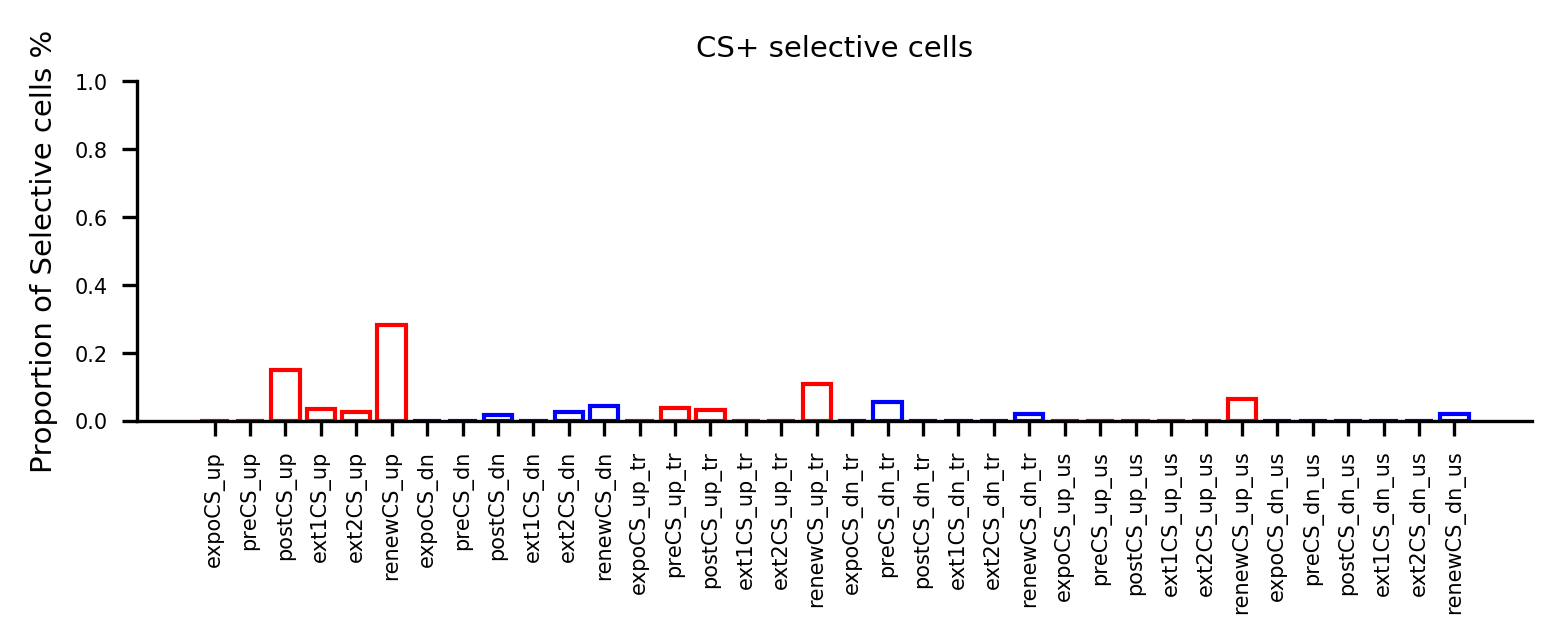

In [14]:
p_names=[] # initializing names list
p = [b[0] for b in CSp_values]
for x in range(0,len(CSp_values)):
        new = p[x][6:]
        p_names.append(new)

fig, ax = pl.subplots(1, 1, figsize=(6, 1.5))
values = CSp_mean_values
pt.plot_bars(values, colors=['red','red','red','red','red','red','blue','blue','blue','blue','blue','blue'], ax=ax)
ax.set_xticks(range(len(CSp_values)))
ax.set_xticklabels(p_names, rotation=90)
pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 1)
ax.set_title('CS+ selective cells')

fig.savefig('../img/proportion_selective_CSp_1sec.pdf')

In [15]:
CSm_values=[]   # initializing values list
CSm_mean_values=[]


session = ['expo','pre','post','ext1','ext2','renew']
trial = ['CSm']
feature = ['','_tr', '_us']
direction = ['up', 'dn']
for f in feature:
    for d in direction:
        for s in session:
            for t in trial:
                c = 'cells_%s%s_%s%s' %(s,t,d,f)
                #print c,
                cc = eval(c)
                #print round(np.mean(cc),3)
                CSm_values.append([c,cc])
                CSm_mean_values.append(np.mean(cc))


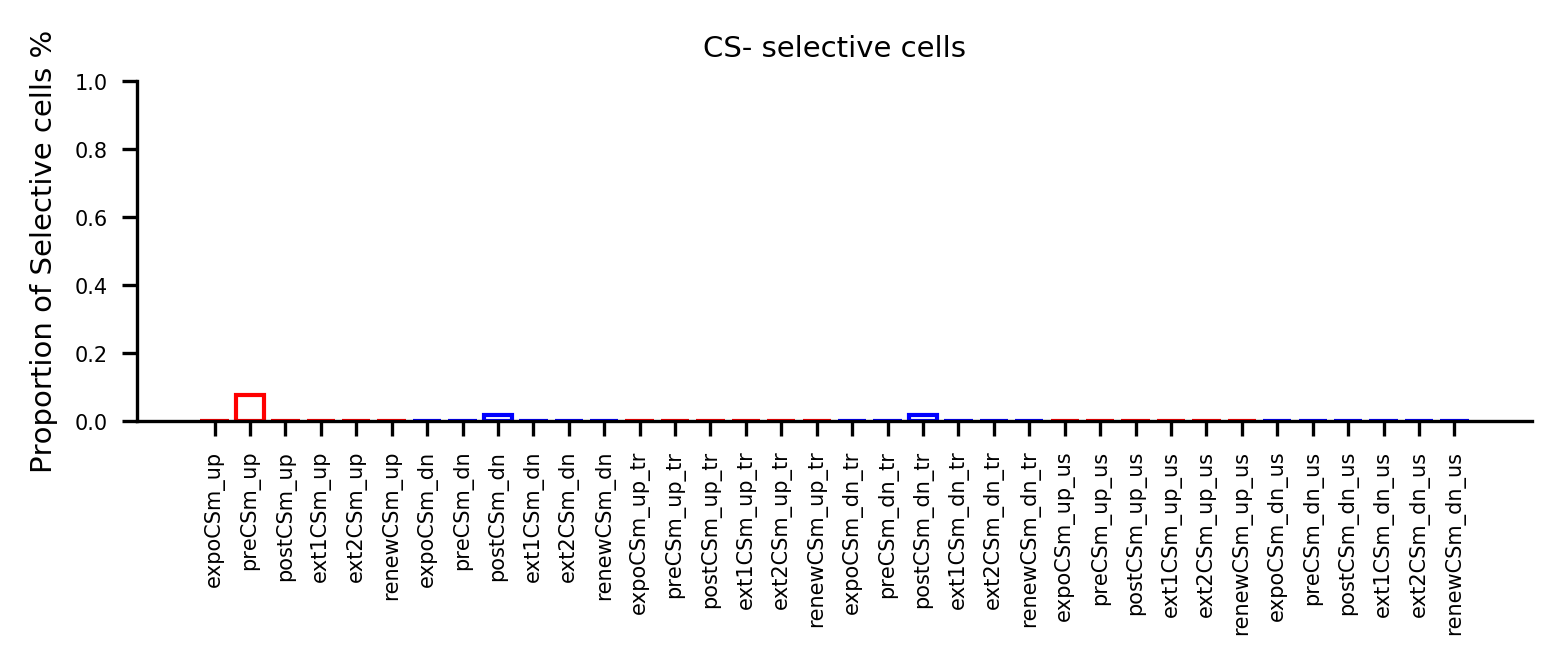

In [16]:
m_names=[] # initializing names list
m = [b[0] for b in CSm_values]
for x in range(0,len(CSm_values)):
        new = m[x][6:]
        m_names.append(new)

fig, ax = pl.subplots(1, 1, figsize=(6, 1.5))
values = CSm_mean_values
pt.plot_bars(values, colors=['red','red','red','red','red','red','blue','blue','blue','blue','blue','blue'], ax=ax)
ax.set_xticks(range(len(CSm_values)))
ax.set_xticklabels(m_names, rotation=90)
pt.nicer_plot(ax)
ax.set_ylabel('Proportion of Selective cells %')
ax.set_ylim(0, 1)
ax.set_title('CS- selective cells')

fig.savefig('../img/proportion_selective_CSm_1sec.pdf')

In [17]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...


In [18]:
#import csv
#a = autorestore_folder.split('/')[:-3]
#data_folder = os.path.join('/', *a)
#animal_ID = data_folder[-4:]


#write CSp data to .csv file
#csvfile = os.path.join(data_folder, 'CSp_selectivity_values_'+animal_ID+'.csv')

#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    for v in CSp_values:
#        writer.writerow([v[0],np.mean(v[1])])

#write to CSm data to .csv file
#csvfile = os.path.join(data_folder, 'CSm_selectivity_values_'+animal_ID+'.csv')
#
#with open(csvfile, "w") as output:
#    writer = csv.writer(output, lineterminator='\n')
#    for v in CSm_values:
#        writer.writerow([v[0],np.mean(v[1])])